In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
#from toolbox import wrappers
#from toolbox import network_utilities
import repos_tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import attila_utils
#import scipy.stats

In [2]:
csva = '../../results/2021-09-02-asthma-drugs/proximity-results.csv'
csvb = '../../results/2021-08-04-guney-tools/proximity-results.csv'
prox = pd.concat([pd.read_csv(c, index_col=['condition', 'target']) for c in [csva, csvb]], axis=0)
# drop unneeded entities
prox = prox.drop('Guney', axis=0, level='condition').drop('HCQ t: TLRs', axis=0, level='target')
# rename AD gene sets
new_setnames = {'knowledge': 'knowledge', 'knowledge-TWAS2plus': 'knowledge TWAS2+', 'knowledge-TWAS2plus-IAPS': 'knowledge TWAS2+ IAPS', 'knowledge-TWAS': 'knowledge TWAS'}
# reorder rows
prox = prox.rename(new_setnames, axis=0, level=0)
target = ['3 AD genes', 'HCQ targets', 'ADRB2', 'CYSLTR1', 'GRIN3A', 'IL6R', 'NR3C1', 'PDE4D']
prox = prox.reindex(pd.MultiIndex.from_product([new_setnames.values(), target]))
# for repos_tools.plot_proximity_results
prox['condition'] = prox.index.get_level_values(level=0)
prox['target'] = prox.index.get_level_values(level=1)
prox

d         z    mean_0     std_0  \
knowledge             3 AD genes   0.000000 -8.115661  1.947667  0.239989   
                      HCQ targets  2.333333  1.587721  1.990667  0.215823   
                      ADRB2        2.000000  1.464464  1.318000  0.465699   
                      CYSLTR1      4.000000  3.120326  2.363000  0.524625   
                      GRIN3A       2.000000  0.095917  1.972000  0.291918   
                      IL6R         1.000000 -3.350524  1.932000  0.278165   
                      NR3C1        1.000000 -0.674985  1.313000  0.463714   
                      PDE4D        1.000000 -1.804276  1.767000  0.425101   
knowledge TWAS2+      3 AD genes   0.000000 -7.743683  1.902333  0.245663   
                      HCQ targets  2.000000  0.218769  1.952000  0.219409   
                      ADRB2        2.000000  2.120025  1.182000  0.385845   
                      CYSLTR1      4.000000  3.123695  2.337000  0.532382   
                      GRIN3A       2.000000  0.211227  1.938000  0.293523   
                      IL6R         1.000000 -2.831598  1.899000  0.317489   
                      NR3C1        1.000000 -0.514026  1.209000  0.406594   
                      PDE4D        1.000000 -1.718304  1.747000  0.434731   
knowledge TWAS2+ IAPS 3 AD genes   0.000000 -7.115839  1.793667  0.252067   
                      HCQ targets  2.000000  0.607272  1.851667  0.244262   
                      ADRB2        1.000000 -0.276453  1.071000  0.256825   
                      CYSLTR1      3.000000  1.566340  2.248000  0.480100   
                      GRIN3A       2.000000  0.323110  1.890000  0.340441   
                      IL6R         1.000000 -2.051455  1.810000  0.394842   
                      NR3C1        1.000000 -0.286794  1.076000  0.264998   
                      PDE4D        1.000000 -1.084978  1.560000  0.516140   
knowledge TWAS        3 AD genes   0.000000 -7.056524  1.831000  0.259476   
                      HCQ targets  2.000000  0.486653  1.885333  0.235623   
                      ADRB2        2.000000  3.280961  1.085000  0.278882   
                      CYSLTR1      3.000000  1.372064  2.251000  0.545893   
                      GRIN3A       2.000000  0.277350  1.900000  0.360555   
                      IL6R         1.000000 -2.362023  1.850000  0.359861   
                      NR3C1        1.000000 -0.302825  1.084000  0.277388   
                      PDE4D        1.000000 -1.390162  1.659000  0.474045   

                                              p              condition  \
knowledge             3 AD genes   2.415732e-16              knowledge   
                      HCQ targets  9.438253e-01              knowledge   
                      ADRB2        9.284664e-01              knowledge   
                      CYSLTR1      9.990967e-01              knowledge   
                      GRIN3A       5.382069e-01              knowledge   
                      IL6R         4.032936e-04              knowledge   
                      NR3C1        2.498428e-01              knowledge   
                      PDE4D        3.559399e-02              knowledge   
knowledge TWAS2+      3 AD genes   4.828871e-15       knowledge TWAS2+   
                      HCQ targets  5.865851e-01       knowledge TWAS2+   
                      ADRB2        9.829980e-01       knowledge TWAS2+   
                      CYSLTR1      9.991070e-01       knowledge TWAS2+   
                      GRIN3A       5.836448e-01       knowledge TWAS2+   
                      IL6R         2.315803e-03       knowledge TWAS2+   
                      NR3C1        3.036170e-01       knowledge TWAS2+   
                      PDE4D        4.287058e-02       knowledge TWAS2+   
knowledge TWAS2+ IAPS 3 AD genes   5.561709e-13  knowledge TWAS2+ IAPS   
                      HCQ targets  7.281647e-01  knowledge TWAS2+ IAPS   
                      ADRB2        3.911001e-01  knowledge TWAS2+ IAPS   
                    

## Sensitivity to input AD gene set
### Graphs

['named-figure/proximity-knowledge.png',
 'named-figure/proximity-knowledge.pdf']

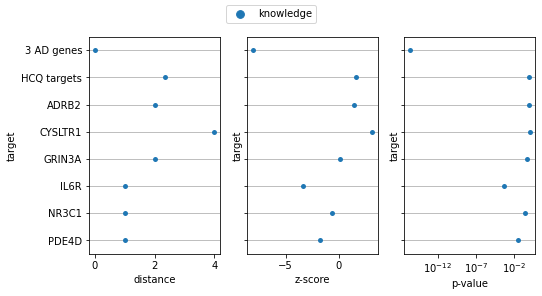

In [3]:
fig, ax = repos_tools.plot_proximity_results(prox.xs('knowledge', axis=0, level=0), jitter=False)
attila_utils.savefig(fig, 'proximity-knowledge')

['named-figure/proximity-knowledge-v2.png',
 'named-figure/proximity-knowledge-v2.pdf']

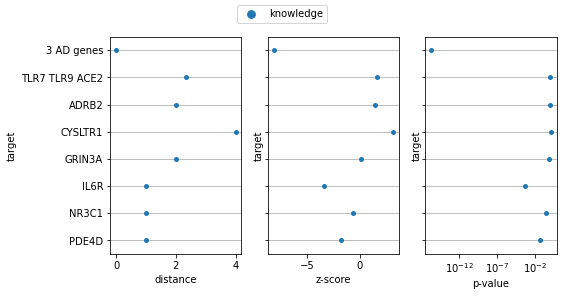

In [4]:
def replace_yaxislabel(ax, label_ix=1, new_label='this or that'):
    l = [x.get_text() for x in ax.get_yticklabels()]
    l[label_ix] = new_label
    ax.set_yticklabels(l)
    return(ax)

fig, ax = repos_tools.plot_proximity_results(prox.xs('knowledge', axis=0, level=0), jitter=False)
replace_yaxislabel(ax[0], label_ix=1, new_label='TLR7 TLR9 ACE2')
attila_utils.savefig(fig, 'proximity-knowledge-v2')

['named-figure/proximity-knowledge-TWAS2plus-IAPS.png',
 'named-figure/proximity-knowledge-TWAS2plus-IAPS.pdf']

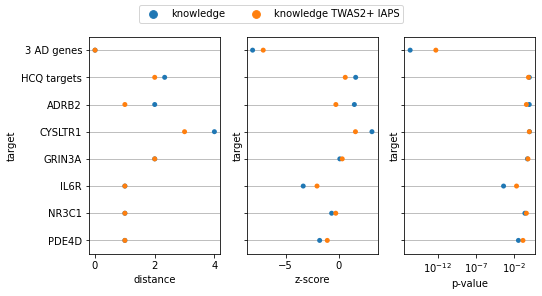

In [5]:
fig, ax = repos_tools.plot_proximity_results(prox.drop(['knowledge TWAS2+', 'knowledge TWAS'], axis=0, level=0), jitter=False)
attila_utils.savefig(fig, 'proximity-knowledge-TWAS2plus-IAPS')

['named-figure/proximity-knowledge-TWAS2plus-IAPS-v2.png',
 'named-figure/proximity-knowledge-TWAS2plus-IAPS-v2.pdf']

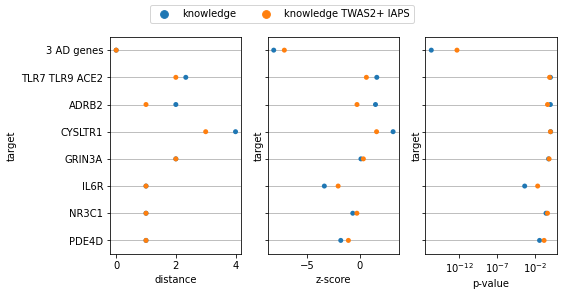

In [6]:
fig, ax = repos_tools.plot_proximity_results(prox.drop(['knowledge TWAS2+', 'knowledge TWAS'], axis=0, level=0), jitter=False)
replace_yaxislabel(ax[0], label_ix=1, new_label='TLR7 TLR9 ACE2')
attila_utils.savefig(fig, 'proximity-knowledge-TWAS2plus-IAPS-v2')

['named-figure/proximity-all.png', 'named-figure/proximity-all.pdf']

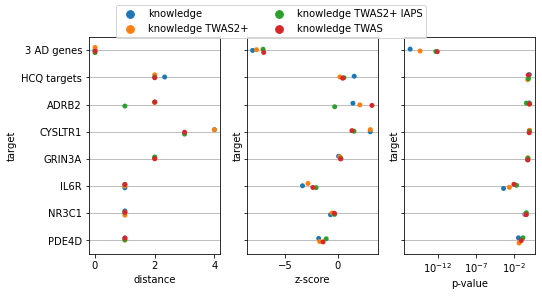

In [7]:
fig, ax = repos_tools.plot_proximity_results(prox)
attila_utils.savefig(fig, 'proximity-all')

['named-figure/proximity-all-v2.png', 'named-figure/proximity-all-v2.pdf']

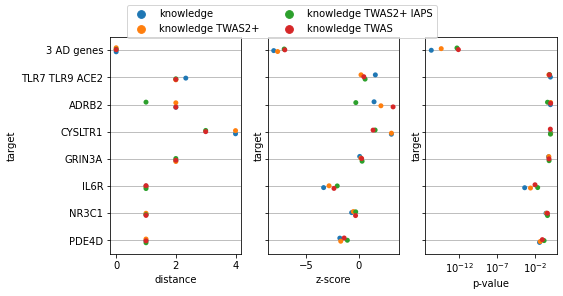

In [8]:
fig, ax = repos_tools.plot_proximity_results(prox)
replace_yaxislabel(ax[0], label_ix=1, new_label='TLR7 TLR9 ACE2')
attila_utils.savefig(fig, 'proximity-all-v2')

### Quantifying impact of input AD gene set

Here I use root mean square deviation (RMSD) of $d_x$ from $d_\mathrm{knowledge}$ and $z_\mathrm{knowledge}$, where $x \in \{\text{knowledge TWAS2+}, \text{knowledge TWAS}, \text{knowledge TWAS2+ IAPS}\}$.  RMSD is defined as
$$
\sqrt{\sum (d_x - d_\mathrm{knowledge})^2}
$$

In [9]:
def my_rms(prox, values='d'):
    df = prox.pivot(index='target', columns='condition', values=values)
    s = df.apply(lambda x: (x - df.knowledge) ** 2, axis=0).sum(axis=0)
    s = s.apply(lambda x: np.sqrt(x))
    return(s)

d = {y: my_rms(prox, values=y) for y in list('dz')}
rms = pd.DataFrame(d, index=d['d'].index)

def get_setsize(setname='knowledge'):
    fpath = '../../results/2021-07-01-high-conf-ADgenes/AD-genes-' + setname
    with open(fpath) as f:
        l = f.readlines()
    return(len(l))

rms = rms.reindex(new_setnames.values())
rms['n_genes'] = [get_setsize(y) for y in new_setnames.keys()]
rms = rms.reindex(['n_genes', 'd', 'z'], axis=1)
rms

,n_genes,d,z
condition,,,
knowledge,26,0.000000,0.000000
knowledge TWAS2+,52,0.333333,1.660737
knowledge TWAS2+ IAPS,77,1.452966,3.132710
knowledge TWAS,145,1.054093,3.163898


['named-figure/rmsd-barchart.png', 'named-figure/rmsd-barchart.pdf']

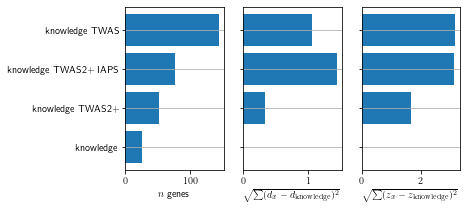

In [10]:
matplotlib.rcParams['text.usetex'] = True
fig, ax = plt.subplots(1, 3, figsize=(6, 3), sharey=True)
for var, axi in zip(rms.columns, ax):
    axi.barh(np.arange(len(rms)), rms[var], tick_label=rms.index)
    axi.grid(True, axis='y')

ax[0].set_xlabel(r'$n$ genes')
ax[1].set_xlabel(r'$\sqrt{\sum (d_x - d_\mathrm{knowledge})^2}$')
ax[2].set_xlabel(r'$\sqrt{\sum (z_x - z_\mathrm{knowledge})^2}$')
attila_utils.savefig(fig, 'rmsd-barchart')

In [11]:
%connect_info

{
  "shell_port": 35381,
  "iopub_port": 49127,
  "stdin_port": 44467,
  "control_port": 35957,
  "hb_port": 57341,
  "ip": "127.0.0.1",
  "key": "cd67d5ed-30c004b62b7eb96ce6c6a8f3",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-39269e69-345f-492c-afb0-edec99495922.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
